# Data Analysis of NBA Shot Clock Data (Part I)

### Now that we've cleaned up our data we can now start to explore some trends and patters in our data. We can start to answer some questions like the following:

 * **What were some league averages? (3 Point %, 2 Point %, Shot Distance, etc.)**
 * **Who shot well (overall)? Who shot the 3 ball well?**
 * **Who holds onto the ball the most?**
 
And a bunch more questions can be answered from this data. We'll first load up the final dataset that we had saved from the final data cleaning notebook

In [67]:
import pandas as  pd
import os

pd.set_option('display.max_columns', 30)

parent_path = os.path.dirname(os.path.dirname(os.getcwd()))

replace_double_slash = parent_path.replace('\\', '/')

data_path = replace_double_slash + '/data/shot_logs_clean_final.csv'

nba_shot_data = pd.read_csv(data_path)

nba_shot_data.head()

,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,1,1,00:01:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,"Roberts, Brian",203148
1,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,2,1,00:00:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,"Roberts, Brian",203148
2,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,3,1,00:00:00,0.0,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,"Roberts, Brian",203148
3,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,4,2,00:11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,"Roberts, Brian",203148
4,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,5,2,00:10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,"Roberts, Brian",203148


Let's answer one of our questions. What was the league averages for some of these metrics across the board? The variables in question will be the following:

* **Dribbles**
* **Touch Time**
* **Shot Distance**
* **Closest Defender Distance**
* ** % 2 Points Made **
* ** % 3 Points Made**

So, we'll do the first four in one part and the other two in a separate part

In [68]:
import numpy as np

col_list = ['Dribbles', 'Touch Time', 'Shot Dist', 'Close Def Dist']

quant = nba_shot_data[col_list]

two_pointers = nba_shot_data[nba_shot_data['Pts Type'] == 2][['Fgm', 'Pts Type']].reset_index(drop=True)
three_pointers = nba_shot_data[nba_shot_data['Pts Type'] == 3][['Fgm', 'Pts Type']].reset_index(drop=True)
averages = quant.apply(np.mean, axis=0)


for item in list(averages.index):
    print("League Average " + item + ": " + "{:.2f}".format(averages[item]))

print("League Average 2 PT FG % : " + '{:.2%}'.format(two_pointers['Fgm'].mean()))
print("League Average 3 PT FG % : " + '{:.2%}'.format(three_pointers['Fgm'].mean()))

League Average Dribbles: 2.03
League Average Touch Time: 2.77
League Average Shot Dist: 13.57
League Average Close Def Dist: 4.12
League Average 2 PT FG % : 48.86%
League Average 3 PT FG % : 35.14%


So we see that that the league averages for the metrics listed are the following for the 2014-2015 season:

* Number of dribbles before the shot was on average 2 times
* Average number of seconds the player held onto the ball before shooring was about 3 times
* Players shot on average between 13 to 14 feet from the basket
* The closest defender (not necessarily the correct defender) was 4 feet away from the defender about to shoot
* The average shooting percentage of 2 pointers was about 49%
* The average shooting percentage on three pointers was about 35%

Using the average gives us somewhat of a baseline indicator of what to expect. We can further analyze the distribution of these factors with box plots, histograms to assess whether or not average should be truly used, but that will be covered for another time.

Now we'll answer another question:

* **Who were the top 10 shot takers? What were the average number of shots taken?**

This is going to be important so in further analysis we can limit our candidates on a baseline number of shots needed to qualify

In [69]:
grouped_data = nba_shot_data.groupby(by=['Player Id', 'Player Name'], as_index=False)

print(grouped_data.size().sort_values(ascending=False).head(10))

print("\n")

print("Average number of shots by a player: " + '{:.0f}'.format(grouped_data.size().mean()))

Player Id  Player Name       
201935     Harden, James         1044
101145     Ellis, Mnta           1035
200746     Aldridge, Lamarcus    1034
2544       James, Lebron          977
201566     Westbrook, Russell     969
202691     Thompson, Klay         968
201939     Curry, Stephen         965
203081     Lillard, Damian        959
202681     Irving, Kyrie          942
201936     Evans, Tyreke          911
dtype: int64


Average number of shots by a player: 449


Let's visualize this distribution via a bar chart 

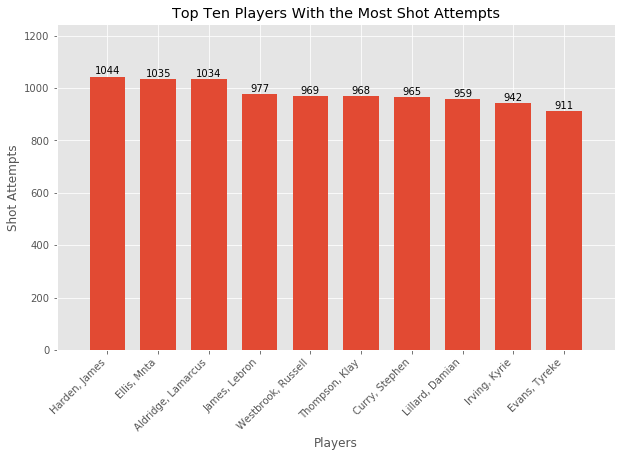

In [70]:
from matplotlib import pyplot as plt

%matplotlib inline

grouped_data = nba_shot_data.groupby(by=['Player Name'])

Top_Ten = grouped_data.size().sort_values(ascending=False)[:10]

plt.style.use('ggplot')

x_vals = np.array(Top_Ten.index)

y_vals = np.array(Top_Ten[0:10])

ind = np.linspace(1, 10, 10)

width = 0.7

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

ax.set_xlim((0, Top_Ten.shape[0]+1))

ax.set_ylim((0, np.max(Top_Ten) + 200))

ax.set_xticks(ind)

ax.set_xticklabels(x_vals, rotation=45, ha="right")

ax.set_title("Top Ten Players With the Most Shot Attempts")

ax.set_xlabel("Players")

ax.set_ylabel("Shot Attempts")

def autolabel_nofloat(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0010*height,
                '%d' % height,
                ha='center', va='bottom')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height, float formatted
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0010*height,
                '%.2f' % height,
                ha='center', va='bottom')

rects1 = ax.bar(ind, y_vals, width)

autolabel_nofloat(rects1)

plt.show()

This could have actually been done in far fewer lines (using series.plot), but using matplotlib like above allows more control on the output of the plot. Now we'll caculate the most efficient shooters (both, then just 3s).

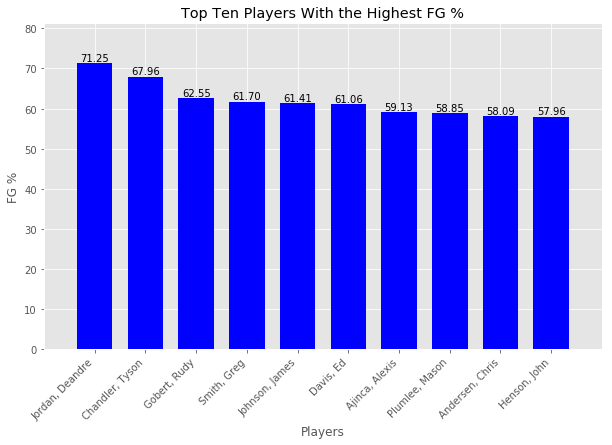

In [71]:
good_shooters = grouped_data.agg({'Fgm': 'mean'}).sort_values(by='Fgm', ascending=False)

good_shooters

Top_Ten_2 = good_shooters[:10]

plt.style.use('ggplot')

x_vals = np.array(Top_Ten_2.index)

y_vals = np.array(np.round(Top_Ten_2[0:10]*100, decimals=2))

ind = np.linspace(1, 10, 10)

width = 0.7

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

ax.set_xlim((0, x_vals.shape[0]+1))

ax.set_ylim((0, np.max(y_vals) + 10))

ax.set_xticks(ind)

ax.set_xticklabels(x_vals, rotation=45, ha="right")

ax.set_title("Top Ten Players With the Highest FG %")

ax.set_xlabel("Players")

ax.set_ylabel("FG %")

rects1 = ax.bar(ind, y_vals, width, color='blue')

autolabel(rects1)

plt.show()

DeAndre Jordan leads with a FG % of 71%. Followed by Tyson Chandler and Rudy Gobert. Considering the league average hovers around the 50% mark, this is extremely exceptional. However, there are some things to consider when interpreting anything out of this plot, which we'll discuss toward the end


Now let's move to 3 point shooters

In [72]:
three_point_shoot = nba_shot_data[nba_shot_data['Pts Type'] == 3]

grouping = three_point_shoot.groupby(by='Player Name')

all_3_pts = grouping.size().sort_values(ascending=False)

greater_mean =  all_3_pts[all_3_pts > np.mean(all_3_pts)]

player_names = list(greater_mean.index)

true_shooters = nba_shot_data[(nba_shot_data['Pts Type'] == 3) & (nba_shot_data['Player Name'].isin(player_names))]

true_grouping = true_shooters.groupby(by = 'Player Name')

best_3_pts = true_grouping.agg({'Fgm': 'mean'}).sort_values('Fgm', ascending=False)

Top_Ten_3 = best_3_pts[:10]

Top_Ten_3

,Fgm
Player Name,
"Korver, Kyle",0.491176
"Lee, Courtney",0.434783
"Thompson, Klay",0.433498
"Barnes, Harrison",0.432258
"Beal, Bradley",0.426136
"Redick, Jj",0.425532
"Curry, Stephen",0.418502
"Middleton, Khris",0.415663
"Dudley, Jared",0.411392


So...what just happened. We filtered out people who took less than the average number of three point attempts, and then found the top 10 most efficient three point shooters.

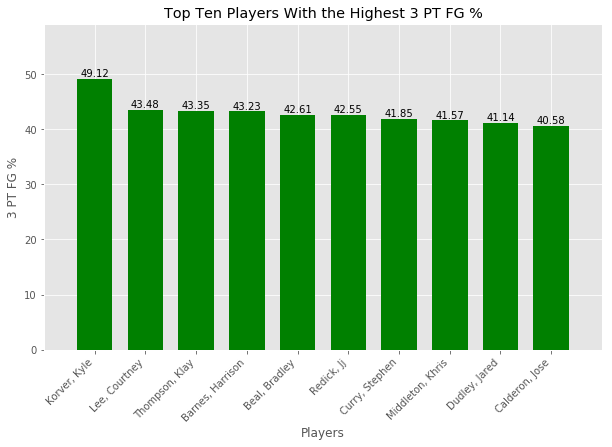

In [73]:
plt.style.use('ggplot')

x_vals = np.array(Top_Ten_3.index)

y_vals = np.array(np.round(Top_Ten_3[0:10]*100, decimals=2))

ind = np.linspace(1, 10, 10)

width = 0.7

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

ax.set_xlim((0, x_vals.shape[0]+1))

ax.set_ylim((0, np.max(y_vals) + 10))

ax.set_xticks(ind)

ax.set_xticklabels(x_vals, rotation=45, ha="right")

ax.set_title("Top Ten Players With the Highest 3 PT FG %")

ax.set_xlabel("Players")

ax.set_ylabel("3 PT FG %")

rects1 = ax.bar(ind, y_vals, width, color='green')

autolabel(rects1)

plt.show()

Number of attempts non-withstanding, Korver leads the pack with a ridiculous near 50% 3 Point shooting clip, followed by known deadly shooters the Splash Brothers, Bradley Beal, and JJ Redick.

We'll do one final visual on touch time to see who holds onto the ball the most. This time we'll exclude players who have had attempts less than average like last time

In [74]:
Players = grouped_data.size()

players_final = list(Players[Players > np.mean(Players)].index)

touch_times = nba_shot_data[nba_shot_data['Player Name'].isin(players_final)]

group_touch = touch_times.groupby('Player Name')

final_touch = group_touch.agg({'Touch Time': 'mean'}).sort_values('Touch Time', ascending=False)[:10]

final_touch

,Touch Time
Player Name,
"Paul, Chris",5.997285
"James, Lebron",5.724360
"Harden, James",5.706034
"Wall, John",5.630869
"Teague, Jeff",5.549392
"Payton, Elfrid",5.525630
"Augustin, Dj",5.492586
"Jack, Jarrett",5.480556
"Williams, Deron",5.405501


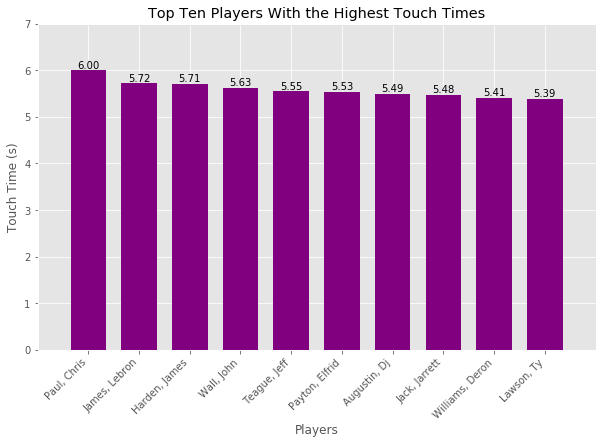

In [75]:
x_vals = np.array(final_touch.index)

y_vals = np.array(np.round(final_touch[0:10], decimals=2))

ind = np.linspace(1, 10, 10)

width = 0.7

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

ax.set_xlim((0, x_vals.shape[0]+1))

ax.set_ylim((0, np.max(y_vals) + 1))

ax.set_xticks(ind)

ax.set_xticklabels(x_vals, rotation=45, ha="right")

ax.set_title("Top Ten Players With the Highest Touch Times")

ax.set_xlabel("Players")

ax.set_ylabel("Touch Time (s)")

rects1 = ax.bar(ind, y_vals, width, color='purple')

autolabel(rects1)

plt.show()